In [1]:
from google.colab import drive
drive.mount('/content/gdrive')  #mounting


Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/solar/"

/content/gdrive/My Drive/solar


In [3]:
#Invertor Data - ICR 1 Report - 20200923.xls

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [5]:
warnings.filterwarnings("ignore")

# ABOUT DEVICE

Solar energy works when the photons of an atom knock the electrons free from atoms, generating a flow of electricity.

Solar panels are made up of these small things called PV cells and many PV cells linked together make a solar panel. 

solar panel system uses photons to separate electrons from atoms. Photons are light particles. The process of separating electrons from their atoms creates solar electricity.

Each solar panel contains photovoltaic (PV) cells. PV cells take light, or photons, and convert it to solar electricity. When sunlight hits the solar panel, PV cells 
# produce direct current (DC) electricity.

 Inverters convert solar energy to useful electricity

#Inverters is that they convert DC electricity 
from solar panels to alternating current (AC) electricity.

#A rectifier changes current from alternating current (AC) to direct current (DC)

# ABOUT PARAMETERS

#current:

An electric current is the rate of flow of electric charge past a point or region. An electric current is said to exist when there is a net flow of electric charge through a region. Electric charge is carried by charged particles, so an electric current is a flow of charged particles.
Unit for current is Ampere (A).


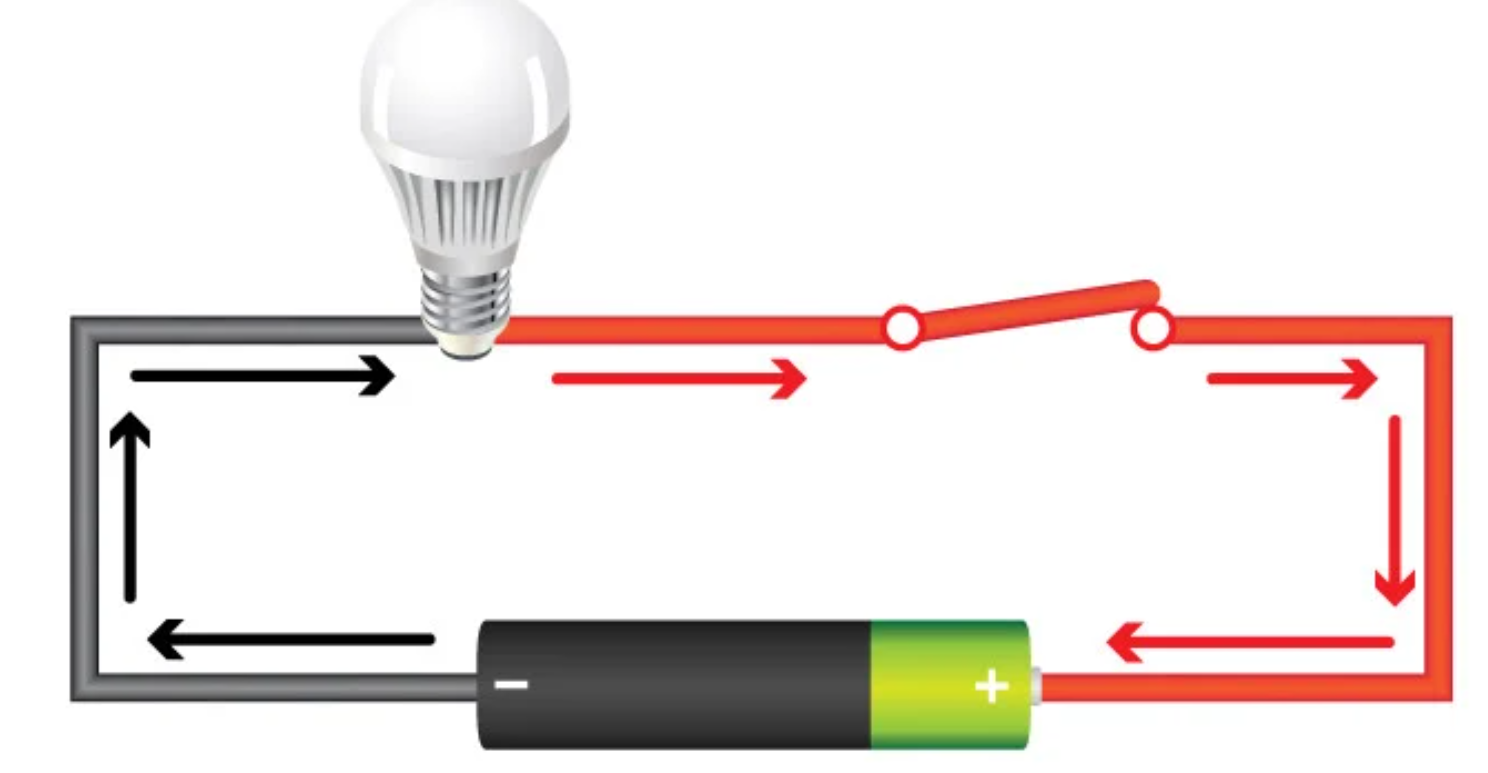

#Voltage 

Voltage is the pressure from an electrical circuit's power source that pushes charged electrons (current) through a conducting loop, enabling them to do work such as illuminating a light. In brief, voltage = pressure, and it is measured in **volts (V)**.

#Power

Power is the amount of energy transferred or converted per unit time. In the International System of Units, the unit of power is the **watt** ,equal to one joule per second. In older works, power is sometimes called activity. Power is a scalar quantity.

#KWH


A kilowatt hour (kWh) is a measure of how much energy you’re using.
It doesn’t mean the number of kilowatts you’re using per hour. It is simply a unit of measurement that equals the amount of energy you would use if you kept a 1,000 watt appliance running for an hour.

#MWH

Megawatt hour (Mwh) is equal to 1000 Kilowatt hours (Kwh).

#PR

Performance Ratio (PR) of a plant for a period of time is energy measured(kWh)/(Irradiance(kWh/m2) on the panel x Active area of PV module(m2) x PV module efficiency). PR is a measure for the performance of a PV system taking into account environmental factors (temperature, irradiation, climate changes etc.).

# PV DC
Photovoltic DC - Generated DC on PV Cells. Which will be converted to AC.

In [17]:
# importing pandas as pd 
import pandas as pd 
# read an excel file and convert  
# into a dataframe object 
df = pd.DataFrame(pd.read_excel("solar.xls",skiprows=6))  # solar.xls ( all column names are modified )
# show the dataframe 
df 

,Date and Time,AC VOLTAGE Inv - 1,AC VOLTAGE Inv - 2,AC VOLTAGE Inv - 3,AC VOLTAGE Inv - 4,AC CURRENT Inv - 1,AC CURRENT Inv - 2,AC CURRENT Inv - 3,AC CURRENT Inv - 4,AC POWER Inv - 1,AC POWER Inv - 2,AC POWER Inv - 3,AC POWER Inv - 4,DC CURRENT Inv - 1,DC CURRENT Inv - 2,DC CURRENT Inv - 3,DC CURRENT Inv - 4,DC POWER Inv - 1,DC POWER Inv - 2,DC POWER Inv - 3,DC POWER Inv - 4,INVERTOR TEMP Inv - 1,INVERTOR TEMP Inv - 2,INVERTOR TEMP Inv - 3,INVERTOR TEMP Inv - 4,KWH Inv - 1,KWH Inv - 2,KWH Inv - 3,KWH Inv - 4,MWH Inv - 1,MWH Inv - 2,MWH Inv - 3,MWH Inv - 4,UP TIME Inv - 1,UP TIME Inv - 2,UP TIME Inv - 3,UP TIME Inv - 4,PR Inv - 1,PR Inv - 2,PR Inv - 3,PR Inv - 4,PV DC VOLTAGE Inv - 1,PV DC VOLTAGE Inv - 2,PV DC VOLTAGE Inv - 3,PV DC VOLTAGE Inv - 4,AC KWH DAY Inv - 1,AC KWH DAY Inv - 2,AC KWH DAY Inv - 3,AC KWH DAY Inv - 4,DC KWH DAY Inv - 1,DC KWH DAY Inv - 2,DC KWH DAY Inv - 3,DC KWH DAY Inv - 4
0,2020-09-23 00:00:00,381.799998,383.733337,382.533335,383.766663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.599998,48.299999,44.200001,42.299999,8524115,8653882,9360459,9021906,8524.115,8653.882,9360.459,9021.906,00:00:00,00:00:00,00:16:00,00:00:00,0.000000,0.000000,0.000000,0.00000,521.299988,524.799988,516.900024,533.400024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2020-09-23 00:01:00,381.933329,383.966665,382.599996,383.766663,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.500000,48.299999,44.200001,42.299999,8524115,8653882,9360459,9021906,8524.115,8653.882,9360.459,9021.906,00:00:00,00:00:00,00:16:00,00:00:00,0.000000,0.000000,0.000000,0.00000,521.299988,524.799988,516.900024,533.400024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2020-09-23 00:02:00,381.966665,383.899994,382.533335,383.733337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.500000,48.200001,44.200001,42.299999,8524115,8653882,9360459,9021906,8524.115,8653.882,9360.459,9021.906,00:00:00,00:00:00,00:00:00,00:00:00,0.000000,0.000000,0.000000,0.00000,521.299988,524.799988,516.900024,533.400024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,2020-09-23 00:03:00,381.933329,383.966665,382.633331,383.900004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.500000,48.200001,44.200001,42.299999,8524115,8653882,9360459,9021906,8524.115,8653.882,9360.459,9021.906,00:00:00,00:00:00,00:00:00,00:00:00,0.000000,0.000000,0.000000,0.00000,521.299988,524.799988,516.900024,533.400024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,2020-09-23 00:04:00,382.000000,383.866669,382.566671,383.733337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.500000,48.200001,44.200001,42.299999,8524115,8653882,9360459,9021906,8524.115,8653.882,9360.459,9021.906,00:00:00,00:00:00,00:00:00,00:00:00,0.000000,0.000000,0.000000,0.00000,521.299988,524.799988,516.900024,533.400024,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,2020-09-23 23:56:00,377.833333,379.599996,378.266673,379.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,49.299999,44.099998,41.900002,8529844,8659840,9366643,9027766,8529.844,8659.840,9366.643,9027.766,12:13:18,12:15:17,12:14:18,12:03:29,0.000000,0.000000,0.000000,0.00000,0.000000,6.500000,5.400000,8.600000,0.0,0.0,0.0,0.0,5805

In [18]:
# Show all column names
df.columns

Index(['Date and Time', 'AC VOLTAGE Inv - 1', 'AC VOLTAGE Inv - 2',
       'AC VOLTAGE Inv - 3', 'AC VOLTAGE Inv - 4', 'AC CURRENT Inv - 1',
       'AC CURRENT Inv - 2', 'AC CURRENT Inv - 3', 'AC CURRENT Inv - 4',
       'AC POWER Inv - 1', 'AC POWER Inv - 2', 'AC POWER Inv - 3',
       'AC POWER Inv - 4', 'DC CURRENT Inv - 1', 'DC CURRENT Inv - 2',
       'DC CURRENT Inv - 3', 'DC CURRENT Inv - 4', 'DC POWER Inv - 1',
       'DC POWER Inv - 2', 'DC POWER Inv - 3', 'DC POWER Inv - 4',
       'INVERTOR TEMP Inv - 1', 'INVERTOR TEMP Inv - 2',
       'INVERTOR TEMP Inv - 3', 'INVERTOR TEMP Inv - 4', 'KWH Inv - 1',
       'KWH Inv - 2', 'KWH Inv - 3', 'KWH Inv - 4', 'MWH Inv - 1',
       'MWH Inv - 2', 'MWH Inv - 3', 'MWH Inv - 4', 'UP TIME Inv - 1',
       'UP TIME Inv - 2', 'UP TIME Inv - 3', 'UP TIME Inv - 4', 'PR Inv - 1',
       'PR Inv - 2', 'PR Inv - 3', 'PR Inv - 4', 'PV DC VOLTAGE Inv - 1',
       'PV DC VOLTAGE Inv - 2', 'PV DC VOLTAGE Inv - 3',
       'PV DC VOLTAGE Inv - 4', 'A

In [19]:
df['DT'] = df['Date and Time'].dt.strftime('%Y/%m/%d %H')


In [20]:
df=df.dropna()
#df.isna().sum()

In [26]:
data=df.groupby(['DT']).sum() 
data.reset_index(inplace=True)

In [28]:
data.to_csv('Hourly_solar.csv')

In [14]:
df1=df.groupby(['DT'])['PR Inv - 1','PR Inv - 2', 'PR Inv - 3', 'PR Inv - 4'].agg('sum')
df1.reset_index(inplace=True)
apple= df1['DT'].str.split(' ',expand=True)
df1['Time']=apple[1]

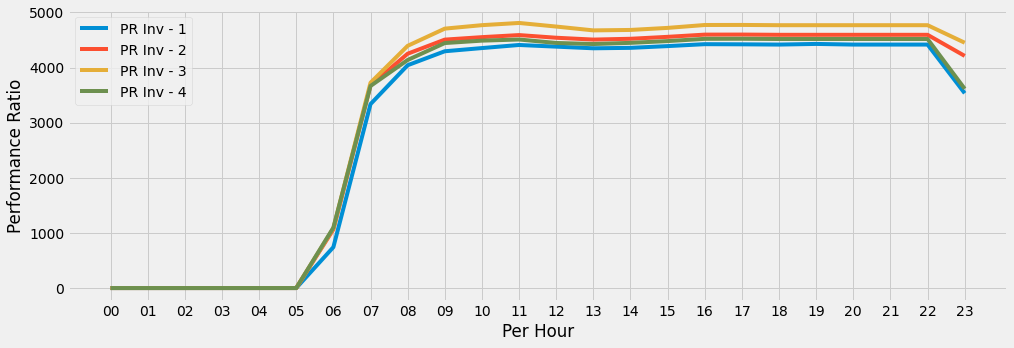

In [15]:
# multiple line plot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
plt.plot( 'Time', 'PR Inv - 1', data=df1)
plt.plot( 'Time', 'PR Inv - 2', data=df1)
plt.plot( 'Time', 'PR Inv - 3', data=df1)
plt.plot( 'Time', 'PR Inv - 4', data=df1)
plt.ylabel('Performance Ratio')
plt.xlabel('Per Hour')
#plt.xticks(rotation=90)
plt.legend()


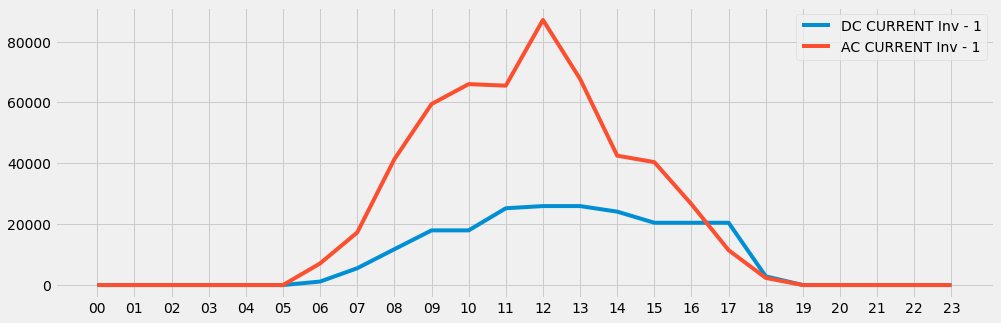

In [16]:
df2=df.groupby(['DT'])['DC CURRENT Inv - 1','AC CURRENT Inv - 1'].agg('sum')
df2.reset_index(inplace=True)
apple= df2['DT'].str.split(' ',expand=True)
df2['Time']=apple[1]
plt.figure(figsize=(15,5))
plt.plot( 'Time', 'DC CURRENT Inv - 1',data=df2)
plt.plot( 'Time', 'AC CURRENT Inv - 1', data=df2)
plt.legend()